# Heart Attack datasets

#age - age of the person
#sex - gender of the person
#cp - chest paint type (0-3)
#trtbps - resting blood pressure(in mm Hg)
#chol - cholestoral in mg/dl fetched via BMI senso
#fbs - fasting blood sugar>120 mg/dl (1=true,0=false)
#restecg - resting electrocardiograhpic results (0-2)
#thalachh - maximum heart rate achieved
#exng - exercise included angina (1=yes,0=no)
#oldpeak - previous peak
#slp - slope (0-2)
#caa - number of major vessels (0-3)
#thall - Thal rate (0-3)
#output - Target Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

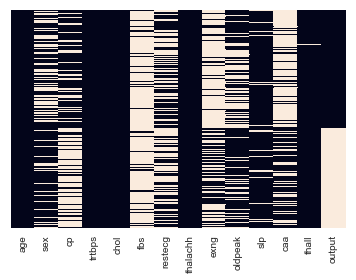

In [8]:
#check if there is a value equal to 0 and that column should not have an 0 value
sns.heatmap(data==0, cbar = False,yticklabels = False)

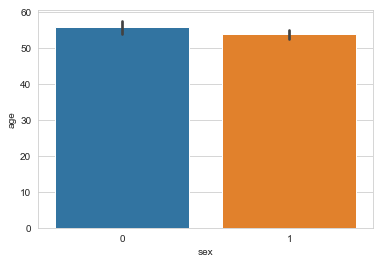

In [9]:
sns.barplot(x='sex',y='age',data=data)

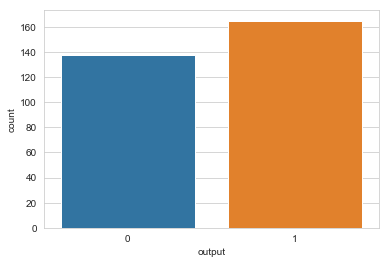

In [10]:
sns.countplot("output",data=data)

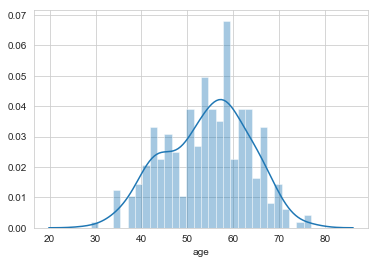

In [11]:
sns.distplot(data['age'],bins=30)

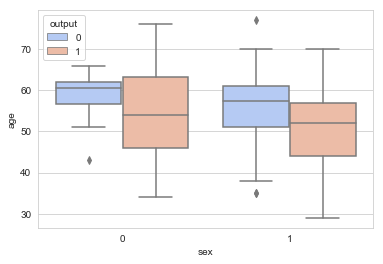

In [12]:
sns.boxplot(x='sex',y='age',hue='output',data=data,palette='coolwarm')

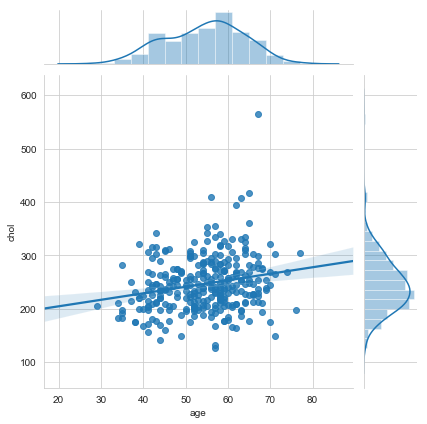

In [13]:
sns.jointplot(x='age',y='chol',data=data,kind='reg')

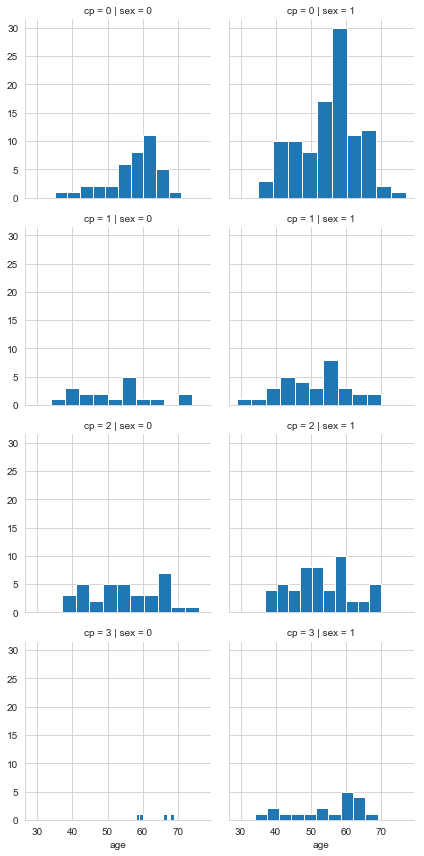

In [14]:
g = sns.FacetGrid(data, col="sex",row="cp")
g = g.map(plt.hist, "age")

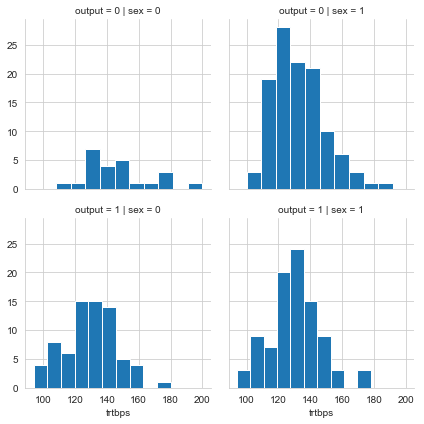

In [15]:
g = sns.FacetGrid(data, col="sex",  row="output")
g = g.map(plt.hist, "trtbps")

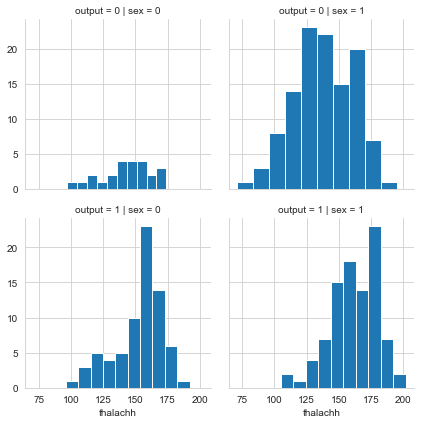

In [16]:
g = sns.FacetGrid(data, col="sex",  row="output")
g = g.map(plt.hist, "thalachh")

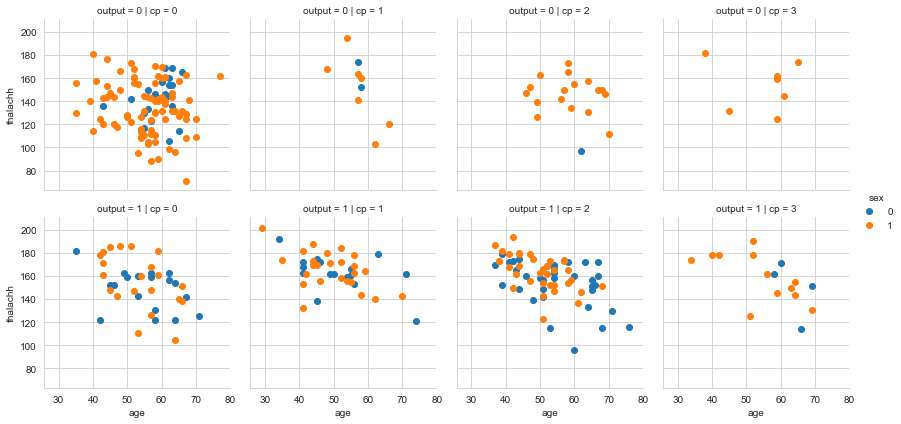

In [17]:
g = sns.FacetGrid(data,row='output',col='cp',hue='sex')
g.map(plt.scatter, "age", "thalachh").add_legend()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('output',axis=1),data['output'],test_size=0.33,random_state=101)

In [19]:
#scale the data to avoid bias of training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Aldrin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aldrin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aldrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [20]:
#find the square root of the data if it is even + 1 or - 1, it is useful for n_neighbors value
np.sqrt(303)

17.406895185529212

# K Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
knn_score = accuracy_score(y_test,y_predict)

[[37 11]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        48
           1       0.82      0.98      0.89        52

   micro avg       0.88      0.88      0.88       100
   macro avg       0.90      0.88      0.88       100
weighted avg       0.90      0.88      0.88       100



# Use another alogorithm technique to compare the accuracy 

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
forest_score = accuracy_score(y_test,y_pred)

[[39  9]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.83      0.87      0.85        52

   micro avg       0.84      0.84      0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

y_pre = model.predict(X_test)

C:\Users\Aldrin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))
logistic_score = accuracy_score(y_test,y_pre)

[[38 10]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.82      0.90      0.86        52

   micro avg       0.85      0.85      0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



# Naive bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train,y_train)

naive_pred = classifier.predict(X_test)

In [52]:
print(confusion_matrix(y_test,naive_pred))
print(classification_report(y_test,naive_pred))
naive_score = accuracy_score(y_test,naive_pred)

[[39  9]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.83      0.87      0.85        52

   micro avg       0.84      0.84      0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



# Support Vector Machine

In [64]:
from sklearn.svm import SVC
reg = SVC(kernel='poly')
reg.fit(X_train,y_train)

reg_pred = reg.predict(X_test)

In [65]:
print(confusion_matrix(y_test,reg_pred))
print(classification_report(y_test,reg_pred))
svm_score = accuracy_score(y_test,reg_pred) 

[[38 10]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.83      0.94      0.88        52

   micro avg       0.87      0.87      0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



In [75]:
data = {"Accuracy Score": [knn_score,forest_score,logistic_score,naive_score,svm_score]}
models_score = pd.DataFrame(data,index=['KNN', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM'])
models_score.sort_values('Accuracy Score', ascending=False)

,Accuracy Score
KNN,0.88
SVM,0.87
Logistic Regression,0.85
Random Forest,0.84
Naive Bayes,0.84
